In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from PIL import Image, ImageOps
import io
import skimage as ski
from skimage.filters import threshold_otsu, threshold_local
import scipy.ndimage as ndi
from scipy.signal import convolve
import pywt
import pandas as pd
import os
#import cairosvg
import matplotlib.cm as cm
from skimage import data
from skimage.util import img_as_ubyte
from skimage.morphology import erosion, dilation, opening, closing, white_tophat  # noqa
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk  # noqa
from scipy.ndimage import generate_binary_structure, white_tophat

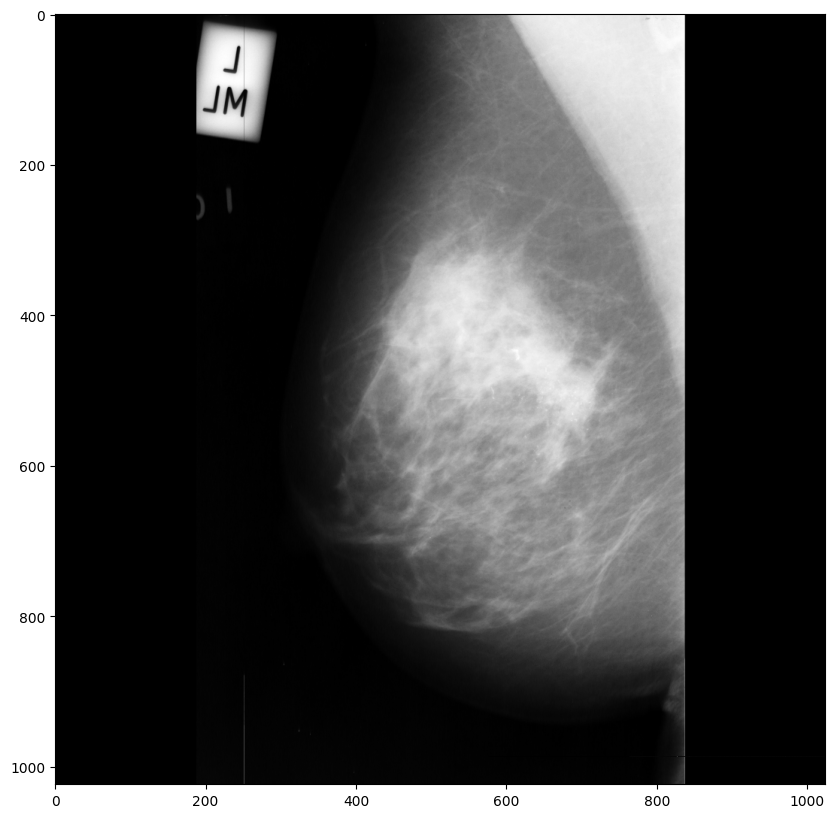

In [2]:
folder_path = "/home/luiz/Downloads/archive(5)/all-mias"
image_paths = glob.glob(f'{folder_path}/*.pgm')
image_paths.sort()
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
plt.figure(figsize=(10,10))
plt.imshow(images[208], cmap="gray")

In [3]:
df = pd.read_csv('/home/luiz/Downloads/archive(5)/Info.txt', sep=" ").drop('Unnamed: 7',axis=1)
df.columns = df.columns.str.capitalize()
df['Path'] = df['Refnum'].apply(lambda x: f"{folder_path}/{x}.pgm")
df['Cancer'] = df['Class'].apply(lambda x: 0 if x.upper() == 'NORM' else 1)
print(df.shape)
df.head()

(330, 9)


,Refnum,Bg,Class,Severity,X,Y,Radius,Path,Cancer
0,mdb001,G,CIRC,B,535.0,425.0,197.0,/home/luiz/Downloads/archive(5)/all-mias/mdb00...,1
1,mdb002,G,CIRC,B,522.0,280.0,69.0,/home/luiz/Downloads/archive(5)/all-mias/mdb00...,1
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,/home/luiz/Downloads/archive(5)/all-mias/mdb00...,0
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,/home/luiz/Downloads/archive(5)/all-mias/mdb00...,0
4,mdb005,F,CIRC,B,477.0,133.0,30.0,/home/luiz/Downloads/archive(5)/all-mias/mdb00...,1


In [4]:
labels = df.drop_duplicates(subset=['Refnum'])['Class']

In [5]:
# Cria uma pasta para salvar as imagens resultantes
output_folder = os.path.join(folder_path, 'imagens_com_circulos')
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Função para desenhar o círculo na imagem
def desenhar_circulo(imagem, x, y, raio):
    if not (pd.isna(x) or pd.isna(y) or pd.isna(raio)):
        center = (int(x), 1024-int(y))  # Certifique-se de que as coordenadas sejam uma tupla de inteiros
        raio = int(raio)  # Certifique-se de que o raio seja um inteiro
        cv2.circle(imagem, center, raio, (0, 255, 0), 2)  # Cor verde com espessura de 2

# Processa as imagens onde há câncer (código 1)
for idx, row in df[df['Cancer'] == 1].iterrows():
    imagem_path = row['Path']
    x, y, raio = row['X'], row['Y'], row['Radius']
    imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza

    if imagem is not None:
        desenhar_circulo(imagem, x, y, raio)
        nome_saida = os.path.join(output_folder, f"{row['Refnum']}_marcada.pgm")
        cv2.imwrite(nome_saida, imagem)
    else:
        print(f"Imagem {row['Refnum']} não encontrada no caminho: {imagem_path}")

print("Processamento concluído!")


Processamento concluído!


Sorted filenames:
['image_realcada_1.pgm', 'image_realcada_2.pgm', 'image_realcada_3.pgm', 'image_realcada_4.pgm', 'image_realcada_5.pgm', 'image_realcada_6.pgm', 'image_realcada_7.pgm', 'image_realcada_8.pgm', 'image_realcada_9.pgm', 'image_realcada_10.pgm', 'image_realcada_11.pgm', 'image_realcada_12.pgm', 'image_realcada_13.pgm', 'image_realcada_14.pgm', 'image_realcada_15.pgm', 'image_realcada_16.pgm', 'image_realcada_17.pgm', 'image_realcada_18.pgm', 'image_realcada_19.pgm', 'image_realcada_20.pgm', 'image_realcada_21.pgm', 'image_realcada_22.pgm', 'image_realcada_23.pgm', 'image_realcada_24.pgm', 'image_realcada_25.pgm', 'image_realcada_26.pgm', 'image_realcada_27.pgm', 'image_realcada_28.pgm', 'image_realcada_29.pgm', 'image_realcada_30.pgm', 'image_realcada_31.pgm', 'image_realcada_32.pgm', 'image_realcada_33.pgm', 'image_realcada_34.pgm', 'image_realcada_35.pgm', 'image_realcada_36.pgm', 'image_realcada_37.pgm', 'image_realcada_38.pgm', 'image_realcada_39.pgm', 'image_realcada

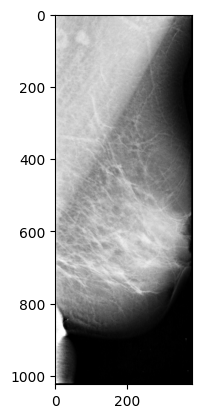

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import re

def extract_number(filename):
    # Extract the first number from the filename
    numbers = re.findall(r'\d+', filename)
    return int(numbers[0]) if numbers else 0

def load_images_from_folder(folder_path):
    images = []
    
    # List all files in the directory
    all_files = os.listdir(folder_path)
    
    # Filter and sort filenames
    filenames = sorted([f for f in all_files if f.lower().endswith('.pgm')], key=extract_number)
    
    print("Sorted filenames:")
    print(filenames)  # Debug: Print sorted filenames
    
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # or cv2.IMREAD_COLOR for color images
        if img is not None:
            images.append(img)
        else:
            print(f"Failed to load image: {filename}")  # Debug: Print failed load attempts
    
    return images

# Load and test
test_folder = "/home/luiz/Documentos/PDI/enhanced_images/"
test_images = load_images_from_folder(test_folder)

# Display a specific image
if len(test_images) > 207:
    plt.imshow(test_images[207], cmap='gray')
    plt.show()
else:
    print("Image index out of range.")


In [51]:
# Lista para armazenar as imagens realçadas
enhanced_images = []

output_dir = "/home/luiz/Documentos/PDI/enhanced_images"

# Itera sobre a lista de imagens
for i, image in enumerate(images):

    output_path = "/home/luiz/Documentos/PDI/enhanced_images/"f"image_realcada_{i+1}.pgm"
    # Otsu's thresholding
    _, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Fechamento morfológico
    kernel = np.ones((3,3), dtype=np.uint8)
    closing = cv2.morphologyEx(otsu_threshold, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Encontrar o maior contorno
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    breast_area = image[y:y+h, x:x+w]

    # Desenhar o retângulo envolvente mínimo
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(image, [box], 0, (0, 0, 255), 2)

    # Passo 2: Aprimoramento de contraste

    # Estrutura morfológica elíptica
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))

    # Passo 1: Calcular a diferença da abertura morfológica
    image_opening = cv2.morphologyEx(breast_area, cv2.MORPH_OPEN, se)
    Fd1 = cv2.subtract(breast_area, image_opening)

    # Passo 2: Calcular a diferença do fechamento morfológico
    image_closing = cv2.morphologyEx(breast_area, cv2.MORPH_CLOSE, se)
    Fd2 = cv2.subtract(image_closing, breast_area)

    # Passo 3: Combinar as diferenças para realçar estruturas escuras
    R = cv2.add(breast_area, Fd1)
    R = cv2.subtract(R, Fd2)

    # Adicionar a imagem realçada à lista
    enhanced_images.append(R)

    # enhanced_images contém todas as imagens realçadas
    #plt.figure(figsize=(5,5))
    #plt.imshow(R, cmap='gray')
    #plt.title(f'Imagem Realçada {i+1}')
    #plt.show()
    
    cv2.imwrite(output_path, R)
    
print(len(R))

1010


In [54]:
import cv2
import os

# Specify the input and output directories
input_folder = "/home/luiz/Documentos/PDI/enhanced_images"
output_folder = "/home/luiz/Documentos/PDI/cropped_enhanced_images"

cropped_imgs = []

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through all the files in the input folder
for i, R in enumerate(enhanced_images):
    # Make sure to process only image files (e.g., .pgm, .jpg, .jpeg)
   
    # Load the image using OpenCV
    #print(f"Processing file: {input_path}")
    #img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)  # IMREAD_UNCHANGED to preserve the original format
        
    # Get the dimensions of the image
    height, width = R.shape[:2]
    print(f"Original dimensions: {width}x{height}")

    # Check if the image is large enough to crop 4 pixels
    #if height <= 8 or width <= 8:
        #print(f"Image {filename} is too small to crop 4 pixels from each side.")
        #continue

        # Crop 4 pixels from each side (top, bottom, left, right)
    cropped_img = R[10:height-10, 10:width-10]
    cropped_imgs.append(cropped_img)
    cropped_top_hat_image_path = "/home/luiz/Documentos/PDI/cropped_enhanced_images/"f"cropped_enhanced_image_{i+1}.pgm"
    
        # Save the cropped image in the output folder
    cv2.imwrite(cropped_top_hat_image_path, cropped_img)
    

Original dimensions: 403x798
Original dimensions: 650x921
Original dimensions: 651x923
Original dimensions: 450x1018
Original dimensions: 557x950
Original dimensions: 561x1024
Original dimensions: 467x950
Original dimensions: 543x989
Original dimensions: 475x1024
Original dimensions: 414x867
Original dimensions: 460x1024
Original dimensions: 478x1024
Original dimensions: 449x873
Original dimensions: 468x938
Original dimensions: 464x709
Original dimensions: 447x811
Original dimensions: 457x899
Original dimensions: 281x977
Original dimensions: 637x1024
Original dimensions: 547x1009
Original dimensions: 467x1003
Original dimensions: 419x873
Original dimensions: 472x1024
Original dimensions: 435x997
Original dimensions: 585x957
Original dimensions: 510x1024
Original dimensions: 651x955
Original dimensions: 498x1001
Original dimensions: 651x859
Original dimensions: 406x910
Original dimensions: 529x909
Original dimensions: 587x1024
Original dimensions: 266x913
Original dimensions: 267x997
Or

In [ ]:
import os
import cv2
import numpy as np
import re

def extract_number(filename):
    # Extrair número do nome do arquivo usando expressão regular
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else 0

# Caminho da pasta que contém as imagens
input_folder = "cropped_enhanced_images"
output_folder = "resized_images"

# Criar pasta de saída se não existir
os.makedirs(output_folder, exist_ok=True)

# Lista para armazenar as imagens redimensionadas
resized_images = []

# Obter lista de arquivos da pasta e ordenar numericamente
filenames = sorted([f for f in os.listdir(input_folder) if f.lower().endswith('.pgm')], key=extract_number)

# Iterar sobre os arquivos da pasta "enhanced_images"
for i, filename in enumerate(filenames):
    
    img_path = os.path.join(input_folder, filename)
    
    # Ler a imagem PNG
    image_array = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Ler imagem incluindo canal alfa se existir

    if image_array is not None:
        # Redimensionar a imagem
        resized = cv2.resize(image_array, (1024, 1024))
        resized_images.append(resized)
        
        # Caminho para salvar a imagem redimensionada
        output_path = "/home/luiz/Documentos/PDI/resized_images/"f"resized_image_{i+1}.pgm"
        cv2.imwrite(output_path, resized)
        
        print(f"Imagem redimensionada salva em: {output_path}")
        
    else:
        print(f"Erro ao carregar a imagem: {filename}")
    

In [ ]:
def nonlinear_transformation(image, p):
    # Normalize the image to the range [0, 1]
    normalized_image = image / 255.0
    
    # Apply the power-law transformation
    transformed_image = np.power(normalized_image, p)
    
    # Rescale the image to the range [0, 255]
    transformed_image = np.clip(transformed_image * 255, 0, 255).astype(np.uint8)
    
    return transformed_image

# Lista para armazenar as imagens após a transformação não linear
nonlinear_images = []

resized_images_folder = "resized_images"
output_folder = "/home/luiz/Documentos/PDI/nonlinear_enhanced_images"

# Iterar sobre os arquivos da pasta "resized_images"
for i, resized in enumerate(resized_images):

    # Carregar a imagem
        #img_path = os.path.join(resized_images_folder, filename)
        #img = cv2.imread(img_path)
        
        #if img is not None:
            # Aplicar a transformação não linear na imagem
        R_nonlinear = nonlinear_transformation(resized, 5)

            # Adicionar a imagem transformada à lista
        nonlinear_images.append(R_nonlinear)
            
            # Salvar a imagem transformada (opcional)
        output_path = "/home/luiz/Documentos/PDI/nonlinear_enhanced_images/"f"nonlinear_enhanced_images_{i+1}.pgm"
        cv2.imwrite(output_path, R_nonlinear)
            
        print(f"Imagem não linear transformada salva em: {output_path}")
        #else:
         #   print(f"Erro ao carregar a imagem: {filename}")
print(len(nonlinear_images))
# Opcional: Mostrar e salvar os resultados de cada imagem
# nonlinear_images contém todas as imagens após a transformação não linear
#plt.figure(figsize=(10,10))
#plt.imshow(nonlinear_images[2], cmap="gray")
#plt.title(f'Imagem Transformada Não Linearmente {i+1}')

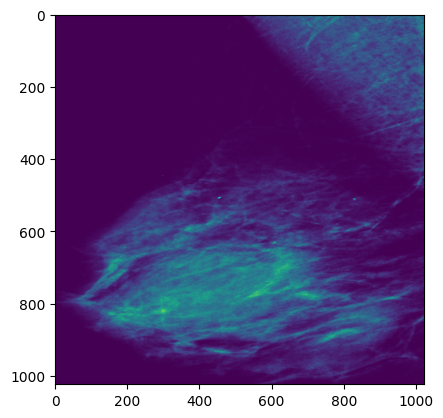

In [57]:
plt.imshow(nonlinear_images[0])

In [5]:
for i, R_nonlinear in enumerate(nonlinear_images):
    # Step 1: Padding na imagem

    if len(R_nonlinear.shape) == 3:
        R_nonlinear = cv2.cvtColor(R_nonlinear, cv2.COLOR_BGR2GRAY)

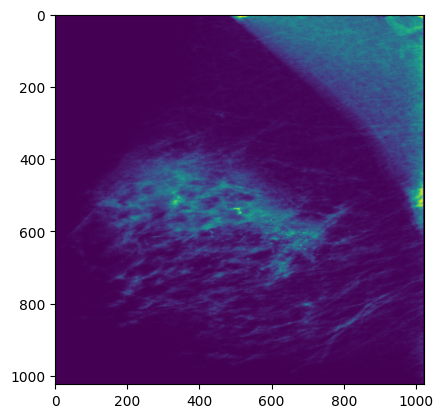

In [33]:
plt.imshow(nonlinear_images[208])

In [17]:
nonlinear_path = "/home/luiz/Documentos/PDI/nonlinear_enhanced_images/"
nonlinear_images = []
nonlinear_images = load_images_from_folder(nonlinear_path)

Sorted filenames:
['nonlinear_enhanced_images_1.pgm', 'nonlinear_enhanced_images_2.pgm', 'nonlinear_enhanced_images_3.pgm', 'nonlinear_enhanced_images_4.pgm', 'nonlinear_enhanced_images_5.pgm', 'nonlinear_enhanced_images_6.pgm', 'nonlinear_enhanced_images_7.pgm', 'nonlinear_enhanced_images_8.pgm', 'nonlinear_enhanced_images_9.pgm', 'nonlinear_enhanced_images_10.pgm', 'nonlinear_enhanced_images_11.pgm', 'nonlinear_enhanced_images_12.pgm', 'nonlinear_enhanced_images_13.pgm', 'nonlinear_enhanced_images_14.pgm', 'nonlinear_enhanced_images_15.pgm', 'nonlinear_enhanced_images_16.pgm', 'nonlinear_enhanced_images_17.pgm', 'nonlinear_enhanced_images_18.pgm', 'nonlinear_enhanced_images_19.pgm', 'nonlinear_enhanced_images_20.pgm', 'nonlinear_enhanced_images_21.pgm', 'nonlinear_enhanced_images_22.pgm', 'nonlinear_enhanced_images_23.pgm', 'nonlinear_enhanced_images_24.pgm', 'nonlinear_enhanced_images_25.pgm', 'nonlinear_enhanced_images_26.pgm', 'nonlinear_enhanced_images_27.pgm', 'nonlinear_enhance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def gaussian_low_pass(img, sigma_r, sigma_c):
    num_rows, num_cols = img.shape
    freq_r = np.fft.fftfreq(num_rows)
    freq_c = np.fft.fftfreq(num_cols)
    freq_r = np.fft.fftshift(freq_r)
    freq_c = np.fft.fftshift(freq_c)    

    freq_r, freq_c = np.meshgrid(freq_r, freq_c, indexing='ij')
    exponent = (freq_r**2 / (2 * sigma_r**2) + freq_c**2 / (2 * sigma_c**2))
    low_pass_gauss_filter = np.exp(-exponent)
    
    return low_pass_gauss_filter

def multiply_alternating(img):
    P, Q = img.shape
    mult_img = img * (-1) ** (np.arange(P)[:, None] + np.arange(Q))
    return mult_img

filtered_images = []

output_folder = "/home/luiz/Documentos/PDI/image_filtrada/"

start_index = 216

for i, R_nonlinear in enumerate(nonlinear_images[start_index:-1], start=start_index):
    
    M, N = R_nonlinear.shape
    img_padded = np.pad(R_nonlinear, ((0, M), (0, N)), mode='constant', constant_values=0)

    P, Q = img_padded.shape

    mult_img = multiply_alternating(img_padded)

    f = np.fft.fft2(mult_img)

    lp_filter = gaussian_low_pass(img_padded, sigma_r=0.05, sigma_c=0.05)
    Fimg_filtered = lp_filter * f

    img_back = np.fft.ifft2(Fimg_filtered)

    mult_img_back = multiply_alternating(img_back.real)

    final_img = mult_img_back[0:M, 0:N]

    filtered_images.append(final_img)
    output_path = f"{output_folder}imagem_filtrada_{i}.pgm"
    print(f"Imagem salva em: {output_path}")

    cv2.imwrite(output_path, final_img)

In [11]:
print(len(filtered_images))

322


In [15]:
for i, filtered in enumerate(filtered_images):
    # Step 1: Padding na imagem

    if len(filtered.shape) == 3:
        filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

In [ ]:
# Itera sobre a lista de caminhos de imagens
filtered_path = "/home/luiz/Documentos/PDI/image_filtrada/"
filtered_images = []
filtered_images = load_images_from_folder(filtered_path)


filenames = sorted([f for f in os.listdir(filtered_path) if f.lower().endswith('.pmg')], key=extract_number)


In [ ]:
# Função para converter SVG para PNG
def svg_to_png(svg_path):
    with open(svg_path, 'rb') as f:
        svg_data = f.read()
    png_data = cairosvg.svg2png(bytestring=svg_data)
    png_image = Image.open(io.BytesIO(png_data))
    return np.array(png_image)

# Define o kernel para dilatação e erosão
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Número total de imagens

# Lista para armazenar as imagens de contorno (boundary)
boundary_images = []
# Lista para armazenar as imagens finais com adição do contorno
filtered_images_list = []  # Renomeie a lista para evitar conflito com a variável 'filtered_image'

boundary_images_folder = "/home/luiz/Documentos/PDI/boundary_image"
filtered_added_images_folder = "/home/luiz/Documentos/PDI/filtered_added_image"

for i, filtered in sorted(enumerate(filtered_images)):

    # Aplicar Transformada Top-Hat
    top_hat = filtered
    
    # Aplicar dilatação e erosão
    img_dilation = cv2.dilate(top_hat, kernel, iterations=1)
    img_erosion = cv2.erode(top_hat, kernel, iterations=1)

    # Calcular o contorno
    boundary = cv2.subtract(img_dilation, img_erosion)

    # Adicionar o contorno à imagem filtrada
    filtered_boundary = cv2.add(filtered, boundary)

    # Adicionar as imagens processadas às listas
    boundary_images.append(boundary)
    filtered_images_list.append(filtered_boundary)  # Adicionar à lista correta

    added_filtered_path = "/home/luiz/Documentos/PDI/filtered_added_image/"f"filtered_added_images_{i+1}.pgm"
    boundary_path = "/home/luiz/Documentos/PDI/boundary_image/"f"boundary_images_{i+1}.pgm"

    cv2.imwrite(added_filtered_path, filtered_boundary)
    cv2.imwrite(boundary_path, boundary)
    
    plt.tight_layout()
    plt.show()


In [ ]:
file_path="/home/luiz/Documentos/PDI/filtered_added_image/"
filtered_images_list = []
filtered_images_list = load_images_from_folder(file_path)
filtered_boundary = sorted([f for f in os.listdir(file_path) if f.lower().endswith('.pgm')], key=extract_number)



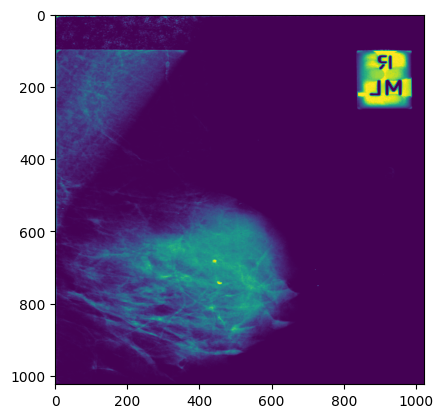

In [13]:
original_image = nonlinear_images[1]
#plt.imshow(filtered_images_list[1])
plt.imshow(original_image)


In [ ]:
# Lista para armazenar as imagens de primeiro plano
foreground_images = []

# Itera sobre a lista de imagens filtradas
for i, filtered_boundary in enumerate(filtered_images_list):
    
    # Verifica se a imagem filtrada é None
    if filtered_boundary is None:
        print(f"Imagem filtrada inválida na posição {i}.")
        continue

    resized_filtered_boundary = cv2.resize(filtered_boundary, (1024,1024))
    
    # Imagem original correspondente
    original_image = nonlinear_images[i]

    # Verifica e ajusta o tipo de dados
    if original_image.dtype != resized_filtered_boundary.dtype:
        resized_filtered_boundary = resized_filtered_boundary.astype(original_image.dtype)

    # Verificar se as dimensões das imagens são compatíveis
    if original_image.shape != resized_filtered_boundary.shape:
        print(f"As dimensões das imagens não coincidem na posição {i}. Ajustando dimensões.")
        print(f"Dimensões da imagem {i}: {original_image.shape}")
        print(f"Dimensões da imagem {i}: {resized_filtered_boundary.shape}")

        original_image = cv2.resize(original_image, (1024, 1024))
        resized_filtered_boundary = cv2.resize(resized_filtered_boundary, (1024, 1024))

    # Calcula a imagem de primeiro plano (foreground)
    foreground_image = cv2.subtract(original_image, resized_filtered_boundary)

    # Adicionar a imagem de primeiro plano à lista
    foreground_images.append(foreground_image)

    # Caminho para salvar a imagem de primeiro plano
    foreground_image_path = "/home/luiz/Documentos/PDI/foreground_image/"f"foreground_image_{i}.pgm"
    
    # Mostrar a imagem de primeiro plano
    plt.figure(figsize=[5, 5])
    plt.imshow(foreground_image, cmap='gray')
    plt.title(f"Foreground Image {i}")
    
    # Salvar a imagem de primeiro plano
    cv2.imwrite(foreground_image_path, foreground_image)

    plt.show()

# foreground_images contém todas as imagens de primeiro plano


(1024, 1024)

In [22]:
print(len(nonlinear_images))

322


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os  # Importa o módulo os

# Lista para armazenar as imagens com Transformada Top-Hat
top_hat_images = []  # Inicialize a lista fora do loop
foreground = []
num_images = 322

foreground_image_folder = "/home/luiz/Documentos/PDI/foreground_image/"
top_hat_image_folder = "/home/luiz/Documentos/PDI/top_hat_image/"  # Certifique-se de fornecer o caminho correto


# Itera sobre a lista de imagens de primeiro plano
for i, foreground_image in enumerate(foreground_images):
    # Caminho para a imagem de primeiro plano e para a imagem resultante
    
    # Define o kernel e aplica a Transformada Top-Hat
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    top_hat = cv2.morphologyEx(foreground_image, cv2.MORPH_TOPHAT, kernel)
    
    # Adicionar a imagem Top-Hat à imagem original
    fig_added = cv2.add(foreground_image, top_hat)
    
    # Adicionar a imagem processada à lista
    top_hat_images.append(fig_added)
    foreground.append(foreground_image)
    
    # Mostrar e salvar a imagem resultante
    plt.figure(figsize=(3, 3))
    plt.imshow(fig_added, cmap='gray')
    plt.title(f"Top-Hat Transformed Image {i+1}")

    
    # Salvar a imagem resultante
    top_hat_image_path = "/home/luiz/Documentos/PDI/top_hat_image/"f"top_hat_image_{i+1}.pgm"
    cv2.imwrite(top_hat_image_path, fig_added)

    plt.show()

# top_hat_images contém todas as imagens processadas com Transformada Top-Hat


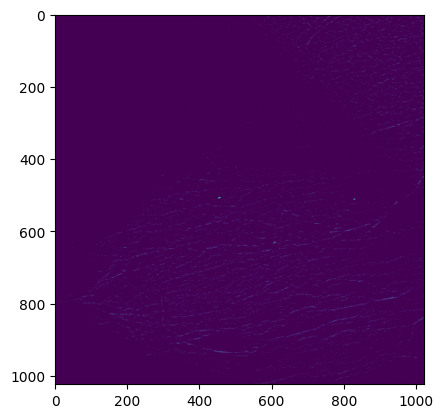

In [44]:
plt.imshow(top_hat_images[0])

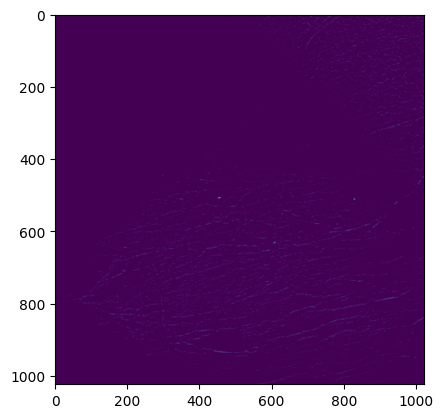

In [43]:
plt.imshow(foreground[0])

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Lista para armazenar as imagens de contorno (boundary)
boundary_images = []
# Lista para armazenar as imagens finais com adição do contorno
foreground_boundary_images = []

# Define o kernel para dilatação e erosão
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Itera sobre a lista de imagens processadas com Transformada Top-Hat
for i, (top_hat, foreground_image) in enumerate(zip(top_hat_images, foreground)):
    # Aqui, 'top_hat' é o item da lista 'top_hat_images'
    # 'foreground_image' é o item correspondente da lista 'foreground'
   
    # Agora você pode realizar operações com 'top_hat' e 'foreground_image'
    # Aplicar dilatação e erosão
    img_dilation = cv2.dilate(top_hat, kernel, iterations=1)
    img_erosion = cv2.erode(top_hat, kernel, iterations=1)

    # Calcular o contorno
    boundary = cv2.subtract(img_dilation, img_erosion)


    # Adicionar o contorno à imagem de primeiro plano
    foreground_boundary = cv2.add(foreground_image, boundary)

    # Adicionar as imagens processadas às listas
    boundary_images.append(boundary)
    foreground_boundary_images.append(foreground_boundary)

    # Mostrar e salvar a imagem de contorno
    #plt.figure(figsize=(10, 10))
    #plt.subplot(1, 2, 1)
    #plt.imshow(boundary, cmap="gray")
    #plt.title(f"Boundary Image {i+1}")
    cv2.imwrite("/home/luiz/Documentos/PDI/contorno/"f"boundary_image_{i}.pgm", boundary)

    # Mostrar e salvar a imagem final com adição do contorno
    #plt.subplot(1, 2, 2)
    #plt.imshow(test_2, cmap="gray")
    #plt.title(f"Final Image {i+1}")
    cv2.imwrite("/home/luiz/Documentos/PDI/foreground_boundary/"f"foreground_boundary_{i}.pgm", foreground_boundary)

    plt.tight_layout()
    plt.show()

# boundary_images contém todas as imagens de contorno
# final_images contém todas as imagens finais com adição do contorno


In [154]:
final_images_path = f"final_image_{i}.png"

In [ ]:
# Itera sobre a lista de caminhos de imagens
output_dir = "/home/luiz/Documentos/PDI/denoised/"
denoised = []

foreground_boundary_path = "/home/luiz/Documentos/PDI/foreground_boundary"
foreground_boundary_images = []
foreground_boundary_images = load_images_from_folder(foreground_boundary_path)


for i, foreground_boundary in enumerate(foreground_boundary_images):
    # Carregar a imagem
    #foreground_boundary_image = cv2.imread(test_2, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar o filtro bilateral
    img_denoised = cv2.bilateralFilter(np.float32(foreground_boundary), 15, 30, 30)
    
    # Gerar o caminho para salvar a imagem processada
    output_path = os.path.join(output_dir, f"img_denoised_{i}.pgm")
    
    # Mostrar a imagem processada
    plt.figure(figsize=[12, 12])
    plt.imshow(img_denoised, cmap='gray')
    plt.title(f"Denoised Image {i+1}")
    denoised.append(img_denoised)
    # Salvar a imagem processada
    cv2.imwrite(output_path, img_denoised)
    plt.close()  # Fecha a figura para liberar memória

    print(f"Imagem processada salva em: {output_path}")


In [10]:
output_dir = "/home/luiz/Documentos/PDI/normalized/"
normalized = []

denoised_path = "/home/luiz/Documentos/PDI/denoised/"
denoised = []
denoised = load_images_from_folder(foreground_boundary_path)



for i, img_denoised in enumerate(denoised):

    normalized_image = cv2.normalize(img_denoised, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    #normalized_image = cv2.normalize(enhanced, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    # Mostrar a imagem processada
    plt.figure(figsize=[5, 5])
    plt.imshow(normalized_image, cmap='gray')
    plt.title(f"Normalized Image {i+1}")
    output_path = os.path.join(output_dir, f"img_normalized{i+1}.pgm")
    normalized.append(normalized_image)
    # Salvar a imagem processada
    cv2.imwrite(output_path, normalized_image)
    plt.close()  # Fecha a figura para liberar memória



Sorted filenames:
['foreground_boundary_0.pgm', 'foreground_boundary_1.pgm', 'foreground_boundary_2.pgm', 'foreground_boundary_3.pgm', 'foreground_boundary_4.pgm', 'foreground_boundary_5.pgm', 'foreground_boundary_6.pgm', 'foreground_boundary_7.pgm', 'foreground_boundary_8.pgm', 'foreground_boundary_9.pgm', 'foreground_boundary_10.pgm', 'foreground_boundary_11.pgm', 'foreground_boundary_12.pgm', 'foreground_boundary_13.pgm', 'foreground_boundary_14.pgm', 'foreground_boundary_15.pgm', 'foreground_boundary_16.pgm', 'foreground_boundary_17.pgm', 'foreground_boundary_18.pgm', 'foreground_boundary_19.pgm', 'foreground_boundary_20.pgm', 'foreground_boundary_21.pgm', 'foreground_boundary_22.pgm', 'foreground_boundary_23.pgm', 'foreground_boundary_24.pgm', 'foreground_boundary_25.pgm', 'foreground_boundary_26.pgm', 'foreground_boundary_27.pgm', 'foreground_boundary_28.pgm', 'foreground_boundary_29.pgm', 'foreground_boundary_30.pgm', 'foreground_boundary_31.pgm', 'foreground_boundary_32.pgm', '

In [11]:
normalized_image.shape

(1024, 1024)

In [ ]:
# Supondo que normalized_images seja uma lista de imagens normalizadas
output_dir = "/home/luiz/Documentos/PDI/blurred_normalized"  # Diretório de saída
gaussian_laplacian_filtered = []

for i, normalized_image in enumerate(normalized):
    # Verificar se a imagem é colorida e converter para grayscale, se necessário
    if len(normalized_image.shape) == 3:
        normalized_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar o filtro Gaussian Blur
    blurred = cv2.GaussianBlur(normalized_image, (3, 3), 0)
    
    # Verificar o tipo de dados da imagem blurred
    print(f"Tipo de dados da imagem blurred: {blurred.dtype}")

    # Aplicar o filtro Laplaciano com profundidade CV_16S
    # Garantir que a imagem de entrada é de tipo CV_16S
    blurred_16S = np.asarray(blurred, dtype=np.int16)
    gaussian_laplacian = cv2.Laplacian(blurred_16S, cv2.CV_16S, ksize=3)
    
    # Converter de CV_16S para CV_8U para visualização correta
    gaussian_laplacian = cv2.convertScaleAbs(gaussian_laplacian)
    
    # Mostrar a imagem filtrada
    plt.figure(figsize=(5, 5))
    plt.subplot(122)
    plt.imshow(gaussian_laplacian, cmap='gray')
    plt.title(f'LoG Filtered Image {i+1}')
    gaussian_laplacian_filtered.append(gaussian_laplacian)
    
    # Salvar a imagem filtrada
    output_path = f"{output_dir}/LoG_Filtered_Image_{i+1}.pgm"
    cv2.imwrite(output_path, gaussian_laplacian)
    
    plt.show()  # Mostrar a imagem


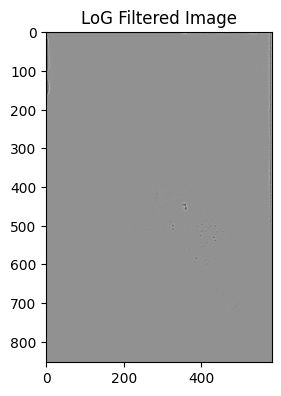

In [18]:
blurred = cv2.GaussianBlur(normalized_image, (3, 3), 0)
filtered_image = cv2.Laplacian(blurred, cv2.CV_16S, ksize=5)

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('LoG Filtered Image')
plt.imsave('LoG_Filtered_Image.svg', filtered_image, cmap="gray")
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

output_dir = "/home/luiz/Documentos/PDI/segmented_image/"  # Ensure this directory exists
segmented = []

# Definir os critérios de K-means e número de clusters (K)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.20)
K = 8  # Número de clusters

# Verifique se o diretório de saída existe, se não, crie-o
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Armazenar a média de brilho de cada cluster
cluster_brightness = []

for i, gaussian_laplacian in enumerate(gaussian_laplacian_filtered):
    if gaussian_laplacian is None:
        print(f"Imagem {i+1} é inválida.")
        continue

    # Converter a imagem em um vetor de pixels
    pixel_values = gaussian_laplacian.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Aplicar K-means
    _, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Converter os centros de volta para 8 bits
    centers = np.uint8(centers)

    # Mapear os labels para os valores dos centros
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(gaussian_laplacian.shape)

    # Calcular a média de brilho de cada cluster
    # Usar labels.flatten() para criar a máscara corretamente
    labels_reshaped = labels.reshape(gaussian_laplacian.shape)
    brightness = [np.mean(segmented_image[labels_reshaped == k]) for k in range(K)]
    cluster_brightness.append(brightness)

    # Determinar o cluster mais brilhante
    brightest_cluster = np.argmax(brightness)

    # Criar uma imagem com apenas o cluster mais brilhante
    highlighted_image = np.where(labels_reshaped == brightest_cluster, 255, 0).astype(np.uint8)

    # Exibir a imagem segmentada
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(segmented_image, cmap='gray')
    plt.title(f'Segmented Image {i+1}')

    plt.subplot(1, 2, 2)
    plt.imshow(highlighted_image, cmap='gray')
    plt.title(f'Brightest Cluster {i+1}')

    # Salvar as imagens
    #segmented_path = os.path.join(output_dir, f"segmented_image_{i+1}.png")
    highlighted_path = os.path.join(output_dir, f"highlighted_brightest_cluster_{i+1}.pgm")
    #plt.imsave(segmented_path, segmented_image, cmap='gray')
    cv2.imwrite(highlighted_path, highlighted_image)

    plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

output_dir = "/home/luiz/Documentos/PDI/segmented_image/"  # Ensure this directory exists
segmented = []

# Definir os critérios de K-means e número de clusters (K)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.20)
K = 2  # Número de clusters

# Verifique se o diretório de saída existe, se não, crie-o
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Armazenar a média de brilho de cada cluster
cluster_brightness = []

for i, gaussian_laplacian in enumerate(gaussian_laplacian_filtered):
    if gaussian_laplacian is None:
        print(f"Imagem {i+1} é inválida.")
        continue

    # Converter a imagem em um vetor de pixels
    pixel_values = gaussian_laplacian.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Aplicar K-means
    _, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Converter os centros de volta para 8 bits
    centers = np.uint8(centers)

    # Mapear os labels para os valores dos centros
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(gaussian_laplacian.shape)

    # Calcular a média de brilho de cada cluster
    # Usar labels.flatten() para criar a máscara corretamente
    labels_reshaped = labels.reshape(gaussian_laplacian.shape)
    brightness = [np.mean(segmented_image[labels_reshaped == k]) for k in range(K)]
    cluster_brightness.append(brightness)

    # Determinar o cluster mais brilhante
    brightest_cluster = np.argmax(brightness)

    # Criar uma imagem com apenas o cluster mais brilhante
    highlighted_image = np.where(labels_reshaped == brightest_cluster, 255, 0).astype(np.uint8)

    # Exibir a imagem segmentada
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(segmented_image, cmap='gray')
    plt.title(f'Segmented Image {i+1}')

    plt.subplot(1, 2, 2)
    plt.imshow(highlighted_image, cmap='gray')
    plt.title(f'Brightest Cluster {i+1}')

    # Salvar as imagens
    #segmented_path = os.path.join(output_dir, f"segmented_image_{i+1}.png")
    highlighted_path = os.path.join(output_dir, f"highlighted_brightest_cluster_{i+1}.pgm")
    #plt.imsave(segmented_path, segmented_image, cmap='gray')
    cv2.imwrite(highlighted_path, highlighted_image)

    plt.show()


In [19]:
# Converter a imagem em um vetor de pixels
pixel_values = filtered_image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# Definir os critérios de K-means e número de clusters (K)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 2  # Número de clusters

# Aplicar K-means
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Converter os centros de volta para 8 bits
centers = np.uint8(centers)

# Mapear os labels para os valores dos centros
segmented_image = centers[labels.flatten()]

# Reshape de volta para o formato original
segmented_image = segmented_image.reshape(filtered_image.shape)


In [28]:
resized_images_folder = "resized_images"
output_folder = "/home/luiz/Documentos/PDI/resulting_images/"

input_folder = "/home/luiz/Documentos/PDI/segmented_image/"  

segmented_images = []
segmented_images = load_images_from_folder(input_folder)
resulting_images = []

os.makedirs(output_folder, exist_ok=True)

# Iterar sobre os arquivos da pasta "resized_images"
for i, (R_nonlinear, segmented) in enumerate(zip(nonlinear_images, segmented_images)):
    
    resulting_img = cv2.add(segmented, R_nonlinear)
    resulting_images.append(resulting_img)

    resulting_path = os.path.join(output_folder, f"resulting_image_{i}.pgm")

    cv2.imwrite(resulting_path, resulting_img)
    


Sorted filenames:
['highlighted_brightest_cluster_1.pgm', 'highlighted_brightest_cluster_2.pgm', 'highlighted_brightest_cluster_3.pgm', 'highlighted_brightest_cluster_4.pgm', 'highlighted_brightest_cluster_5.pgm', 'highlighted_brightest_cluster_6.pgm', 'highlighted_brightest_cluster_7.pgm', 'highlighted_brightest_cluster_8.pgm', 'highlighted_brightest_cluster_9.pgm', 'highlighted_brightest_cluster_10.pgm', 'highlighted_brightest_cluster_11.pgm', 'highlighted_brightest_cluster_12.pgm', 'highlighted_brightest_cluster_13.pgm', 'highlighted_brightest_cluster_14.pgm', 'highlighted_brightest_cluster_15.pgm', 'highlighted_brightest_cluster_16.pgm', 'highlighted_brightest_cluster_17.pgm', 'highlighted_brightest_cluster_18.pgm', 'highlighted_brightest_cluster_19.pgm', 'highlighted_brightest_cluster_20.pgm', 'highlighted_brightest_cluster_21.pgm', 'highlighted_brightest_cluster_22.pgm', 'highlighted_brightest_cluster_23.pgm', 'highlighted_brightest_cluster_24.pgm', 'highlighted_brightest_cluster

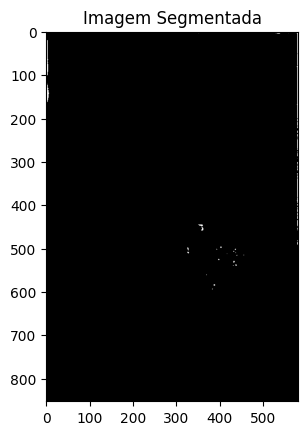

In [20]:
# Mostrar a imagem segmentada
plt.imshow(segmented_image, cmap='gray')
plt.title('Imagem Segmentada')
plt.imsave('segmented_image.svg', segmented_image, cmap="gray")
plt.show()


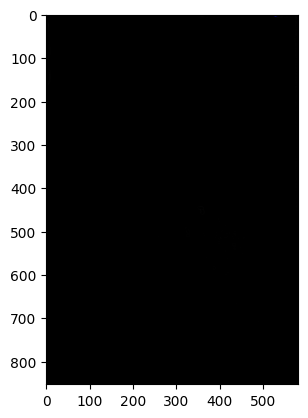

In [24]:
import cv2
import numpy as np

def add_red_dot_to_brightest_part(image, output_image_path):
    # Carregar a imagem em escala de cinza
    #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image.dtype == np.int16 or image.dtype == np.uint16:
            image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))

    # Verificar se a imagem foi carregada corretamente
   
    # Encontrar o pixel com a maior intensidade (parte mais brilhante)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(image)

    # Carregar a imagem original em BGR para desenhar o ponto vermelho
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Desenhar o ponto vermelho na parte mais brilhante
    cv2.circle(color_image, maxLoc, 5, (0, 0, 255), -1)  # Raio de 5 pixels

    # Salvar ou exibir a imagem com os pontos desenhados
    #cv2.imwrite(output_image_path, binary_image)
    plt.imshow(color_image, cmap="gray")
    plt.imsave("labeled_final_image.svg", color_image)
# Exemplo de uso:
# Suponha que 'binary_image' já está carregada como um array NumPy
image = final_image
output_image_path = '/Documentos/PDI/labeled_final_image.svg'
add_red_dot_to_brightest_part(image, output_image_path)
